<a href="https://colab.research.google.com/github/adarshkumaryadav421-prog/test-repo/blob/main/Linear_Transformation_and_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Transformations and Neural Networks
# Outline
- [ 1 - Introduction](#1)
  - [ 1.1 - Transformations](#1.1)
  - [ 1.2 - Linear Transformations](#1.2)
  - [ 1.3 - Transformations Defined as a Matrix Multiplication](#1.3)
- [ 2 - Standard Transformations in a Plane](#2)
  - [ 2.1 - Horizontal Scaling (Dilation)](#2.1)
  - [ 2.2 - Example 2: Reflection about y-axis (the vertical axis)](#2.2)
  - [ 2.3 Stretching by a scalar](#2.3)
    - [ Exercise 1](#ex01)
  - [ 2.4 Horizontal shear transformation](#2.4)
    - [ Exercise 2](#ex02)
  - [ 2.5 Rotation](#2.5)
    - [ Exercise 3](#ex03)
    - [ Exercise 4](#ex04)
- [ 3 - Neural Networks](#3)
  - [ 3.1 - Linear Regression](#3.1)
  - [ 3.2 - Neural Network Model with a Single Perceptron and Two Input Nodes](#3.2)
  - [ 3.3 Parameters of the Neural Network](#3.3)
  - [ 3.4 Forward propagation](#3.4)
    - [ Exercise 5](#ex05)
  - [ 3.5 Defining the cost function](#3.5)
    - [ Exercise 6](#ex06)
  - [ 3.6 - Training the neural network](#3.6)
- [ 4 - Make your predictions!](#4)
  - [ Exercise 7](#ex07)


Welcome to the third assignment of the Linear Algebra course!

This assignment explores the foundational concepts of linear transformations and neural networks in two distinct parts. In the first section, we delve into linear transformations by creating functions to generate matrices for stretching, shearing, and rotation operations. The second part shifts the focus to neural networks, specifically implementing forward propagation in a simple architecture with two inputs and one perceptron. By dissecting these fundamental components, this assignment aims to provide a clear understanding of the role of linear algebra in both vector transformations and neural network computations.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils

In [2]:
%pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=18ddb1e15947ca540e7ff545974aca3072b1f72ffecb8a006070dd4c66d015f3
  Stored in directory: /root/.cache/pip/wheels/b6/a1/81/1036477786ae0e17b522f6f5a838f9bc4288d1016fc5d0e1ec
Successfully built utils


In [7]:
import unittest

def my_function(x):
    return x + 5

class TestMyFunction(unittest.TestCase):
    def test_add(self):
        # this is same as w3_unittest.test(my_function(3), 8)
        self.assertEqual(my_function(3), 8)

# Run all tests
if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)


.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<a name="1"></a>
## 1 - Introduction

<a name="1.1"></a>
### 1.1 - Transformations

A **transformation** is a function from one vector space to another that respects the underlying (linear) structure of each vector space. Referring to a specific transformation, you can use a symbol, such as $T$. Specifying the spaces containing the input and output vectors, e.g. $\mathbb{R}^2$ and $\mathbb{R}^3$, you can write $T: \mathbb{R}^2 \rightarrow \mathbb{R}^3$. Transforming vector $v \in \mathbb{R}^2$ into the vector $w\in\mathbb{R}^3$ by the transformation $T$, you can use the notation $T(v)=w$ and read it as "*T of v equals to w*" or "*vector w is an **image** of vector v with the transformation T*".

The following Python function corresponds to the transformation $T: \mathbb{R}^2 \rightarrow \mathbb{R}^3$ with the following symbolic formula:

$$T\begin{pmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}\end{pmatrix}=
          \begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix}
          \tag{1}
          $$

In [8]:
def T(v):
    w = np.zeros((3,1))
    w[0,0] = 3*v[0,0]
    w[2,0] = -2*v[1,0]

    return w

v = np.array([[3], [5]])
w = T(v)

print("Original vector:\n", v, "\n\n Result of the transformation:\n", w)

Original vector:
 [[3]
 [5]] 

 Result of the transformation:
 [[  9.]
 [  0.]
 [-10.]]


<a name="1.2"></a>
### 1.2 - Linear Transformations

A transformation $T$ is said to be **linear** if the following two properties are true for any scalar $k$, and any input vectors $u$ and $v$:

1. $T(kv)=kT(v)$,
2. $T(u+v)=T(u)+T(v)$.

In the example above $T$ is a linear transformation:

$$T (kv) =
          T \begin{pmatrix}\begin{bmatrix}
          kv_1 \\
          kv_2
          \end{bmatrix}\end{pmatrix} =
          \begin{bmatrix}
           3kv_1 \\
           0 \\
           -2kv_2
          \end{bmatrix} =
          k\begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix} =
          kT(v),\tag{2}$$
          
$$T (u+v) =
          T \begin{pmatrix}\begin{bmatrix}
          u_1 + v_1 \\
          u_2 + v_2
          \end{bmatrix}\end{pmatrix} =
          \begin{bmatrix}
           3(u_1+v_1) \\
           0 \\
           -2(u_2+v_2)
          \end{bmatrix} =
          \begin{bmatrix}
           3u_1 \\
           0 \\
           -2u_2
          \end{bmatrix} +
          \begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix} =
          T(u)+T(v).\tag{3}$$

You can change the values of $k$ or vectors $u$ and $v$ in the cell below, to check that this is true for some specific values.

In [9]:
u = np.array([[1], [-2]])
v = np.array([[2], [4]])

k = 7

print("T(k*v):\n", T(k*v), "\n k*T(v):\n", k*T(v), "\n\n")
print("T(u+v):\n", T(u+v), "\n\n T(u)+T(v):\n", T(u)+T(v))

T(k*v):
 [[ 42.]
 [  0.]
 [-56.]] 
 k*T(v):
 [[ 42.]
 [  0.]
 [-56.]] 


T(u+v):
 [[ 9.]
 [ 0.]
 [-4.]] 

 T(u)+T(v):
 [[ 9.]
 [ 0.]
 [-4.]]


<a name="1.3"></a>
### 1.3 - Transformations Defined as a Matrix Multiplication

Let $L: \mathbb{R}^m \rightarrow \mathbb{R}^n$ be defined by a matrix $A$, where $L(v)=Av$, multiplication of the matrix $A$ ($n\times m$) and vector $v$ ($m\times 1$) resulting in the vector $w$ ($n\times 1$).

Now try to guess, what should be the elements of matrix $A$, corresponding to the transformation $L: \mathbb{R}^2 \rightarrow \mathbb{R}^3$:

$$L\begin{pmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}\end{pmatrix}=
          \begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix}=
          \begin{bmatrix}
           ? & ? \\
           ? & ? \\
           ? & ?
          \end{bmatrix}
          \begin{bmatrix}
           v_1 \\
           v_2
          \end{bmatrix}
          \tag{4}
          $$

To do that, write the transformation $L$ as $Av$ and then perform matrix multiplication:
    $$L\begin{pmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}\end{pmatrix}=
          A\begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}=
          \begin{bmatrix}
           a_{1,1} & a_{1,2} \\
           a_{2,1} & a_{2,2} \\
           a_{3,1} & a_{3,2}
          \end{bmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}=
          \begin{bmatrix}
           a_{1,1}v_1+a_{1,2}v_2 \\
           a_{2,1}v_1+a_{2,2}v_2 \\
           a_{3,1}v_1+a_{3,2}v_2 \\
          \end{bmatrix}=
          \begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix}\tag{5}
          $$
          
Can you see now what should be the values of the elements $a_{i,j}$ of matrix $A$ to make the equalities $(5)$ correct? Find out the answer in the following code cell:

In [10]:
def L(v):
    A = np.array([[3,0], [0,0], [0,-2]])
    print("Transformation matrix:\n", A, "\n")
    w = A @ v

    return w

v = np.array([[3], [5]])
w = L(v)

print("Original vector:\n", v, "\n\n Result of the transformation:\n", w)

Transformation matrix:
 [[ 3  0]
 [ 0  0]
 [ 0 -2]] 

Original vector:
 [[3]
 [5]] 

 Result of the transformation:
 [[  9]
 [  0]
 [-10]]


<a name="2"></a>
## 2 - Standard Transformations in a Plane

As discussed above in section [1](#1), a linear transformation $L: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ can be represented as a multiplication of a $2 \times 2$ matrix and a coordinate vector $v\in\mathbb{R}^2.$ Note that so far you have been using some random vector $v\in\mathbb{R}^2.$ (e.g. $v=\begin{bmatrix}3 \\ 5\end{bmatrix}$). To have a better intuition of what the transformation is really doing in the $\mathbb{R}^2$ space, it is wise to choose vector $v$ in a less random way.

A good choice would be vectors of a standard basis $e_1=\begin{bmatrix}1 \\ 0\end{bmatrix}$ and $e_2=\begin{bmatrix}0 \\ 1\end{bmatrix}$. Let's apply linear transformation $L$ to each of the vectors $e_1$ and $e_2$: $L(e_1)=Ae_1$ and $L(e_2)=Ae_2$. If you put vectors $\{e_1, e_2\}$ into columns of a matrix and perform matrix multiplication

$$A\begin{bmatrix}e_1 & e_2\end{bmatrix}=\begin{bmatrix}Ae_1 & Ae_2\end{bmatrix}=\begin{bmatrix}L(e_1) & L(e_2)\end{bmatrix},\tag{3}$$

you can note that $\begin{bmatrix}e_1 & e_2\end{bmatrix}=\begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}$ (identity matrix). Thus, $A\begin{bmatrix}e_1 & e_2\end{bmatrix} = AI=A$, and

$$A=\begin{bmatrix}L(e_1) & L(e_2)\end{bmatrix}.\tag{4}$$

This is a matrix with the columns that are the images of the vectors of the standard basis.

This choice of vectors \{$e_1, e_2$\} provides opportinuty for the visual representation of the linear transformation $L$ (you will see the examples below).

You will work with an image where you will see every transformation working in practice. Since an image is just a set of points in the plane, you can work with it as a set of vectors and you can stretch them, rotate them and much more!

In [13]:
import numpy as np

# Step 1: Create a dummy "image" as a 2D array
dummy_img = np.random.randint(0, 256, (8, 8))  # 8x8 grayscale values

# Step 2: Save it as text
np.savetxt("image.txt", dummy_img, fmt="%d")

# Step 3: Load it back
img = np.loadtxt("image.txt")

print("Shape:", img.shape)
print(img)



Shape: (8, 8)
[[163.  73.  67. 243. 234.  41. 161.  64.]
 [ 62. 119.  98. 206.  69. 192. 146. 155.]
 [138. 248. 208.  98.  15.  27. 206. 147.]
 [ 40. 179. 150.   2. 140. 173. 120. 235.]
 [200.  64. 208.  52. 237. 232. 202. 171.]
 [116. 135. 110. 144. 121. 182. 231.  38.]
 [182.  10. 225. 204.  91. 188. 165. 113.]
 [236.  69. 189. 218. 189. 219. 237. 234.]]


The image is just a $2 \times 329076$ matrix where each column is a vector in the plane. So you can get all $x$ coordinates by calling `img[0]` and all $y$ coordinates by calling `img[1]`. Now let's plot the image!

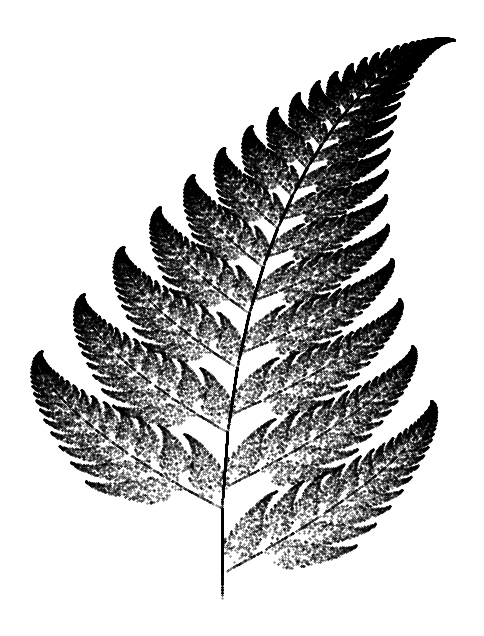

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points
n = 100000

# Storage for points
x = np.zeros(n)
y = np.zeros(n)

for i in range(1, n):
    r = np.random.random()
    if r < 0.01:
        x[i] = 0
        y[i] = 0.16 * y[i-1]
    elif r < 0.86:
        x[i] = 0.85 * x[i-1] + 0.04 * y[i-1]
        y[i] = -0.04 * x[i-1] + 0.85 * y[i-1] + 1.6
    elif r < 0.93:
        x[i] = 0.20 * x[i-1] - 0.26 * y[i-1]
        y[i] = 0.23 * x[i-1] + 0.22 * y[i-1] + 1.6
    else:
        x[i] = -0.15 * x[i-1] + 0.28 * y[i-1]
        y[i] = 0.26 * x[i-1] + 0.24 * y[i-1] + 0.44

# Plot
plt.figure(figsize=(6,8))
plt.scatter(x, y, s=0.1, color="black")
plt.axis("off")
plt.show()



<a name="2.1"></a>
### 2.1 - Horizontal Scaling (Dilation)

Horizontal scaling (factor $2$ in this example) can be defined considering transformation of a vector $e_1=\begin{bmatrix}1 \\ 0\end{bmatrix}$ into a vector $\begin{bmatrix}2 \\ 0\end{bmatrix}$ and leaving vector $e_2=\begin{bmatrix}0 \\ 1\end{bmatrix}$ without any changes. The following function `T_hscaling()` corresponds to the horizontal scaling (factor $2$) of a vector. The second function `transform_vectors()` applies defined transformation to a set of vectors (here two vectors).

In [17]:
def T_hscaling(v):
    A = np.array([[2,0], [0,1]])
    w = A @ v

    return w


def transform_vectors(T, v1, v2):
    V = np.hstack((v1, v2))
    W = T(V)

    return W

e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

transformation_result_hscaling = transform_vectors(T_hscaling, e1, e2)

print("Original vectors:\n e1= \n", e1, "\n e2=\n", e2,
      "\n\n Result of the transformation (matrix form):\n", transformation_result_hscaling)

Original vectors:
 e1= 
 [[1]
 [0]] 
 e2=
 [[0]
 [1]] 

 Result of the transformation (matrix form):
 [[2 0]
 [0 1]]


You can get a visual understanding of the transformation, producing a plot which displays input vectors, and their transformations. We have written this function for you so, so do not need to worry! Just run the next cell.

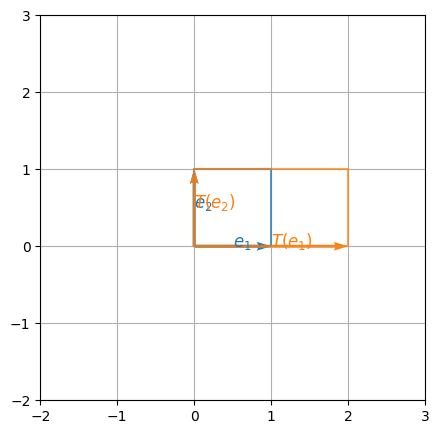

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_matrix(A):
    # Basis vectors
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])

    # Apply transformation
    Te1 = A @ e1
    Te2 = A @ e2

    # Plot
    fig, ax = plt.subplots(figsize=(5,5))

    # Original basis vectors
    ax.quiver(0, 0, e1[0], e1[1], angles='xy', scale_units='xy', scale=1, color='tab:blue')
    ax.text(e1[0]/2, e1[1]/2, r"$e_1$", color='tab:blue', fontsize=12)

    ax.quiver(0, 0, e2[0], e2[1], angles='xy', scale_units='xy', scale=1, color='tab:blue')
    ax.text(e2[0]/2, e2[1]/2, r"$e_2$", color='tab:blue', fontsize=12)

    # Transformed basis vectors
    ax.quiver(0, 0, Te1[0], Te1[1], angles='xy', scale_units='xy', scale=1, color='tab:orange')
    ax.text(Te1[0]/2, Te1[1]/2, r"$T(e_1)$", color='tab:orange', fontsize=12)

    ax.quiver(0, 0, Te2[0], Te2[1], angles='xy', scale_units='xy', scale=1, color='tab:orange')
    ax.text(Te2[0]/2, Te2[1]/2, r"$T(e_2)$", color='tab:orange', fontsize=12)

    # Draw unit square and its transformation
    square = np.array([[0,0], [1,0], [1,1], [0,1], [0,0]])
    transformed_square = (A @ square.T).T

    ax.plot(square[:,0], square[:,1], color="tab:blue", alpha=0.7)
    ax.plot(transformed_square[:,0], transformed_square[:,1], color="tab:orange", alpha=0.7)

    # Formatting
    ax.set_xlim(-2, 3)
    ax.set_ylim(-2, 3)
    ax.set_aspect("equal")
    ax.grid(True)
    plt.show()

# Example: horizontal scaling
A = np.array([[2,0],[0,1]])
plot_matrix(A)


Let's visualize how it acts in our leaf image.

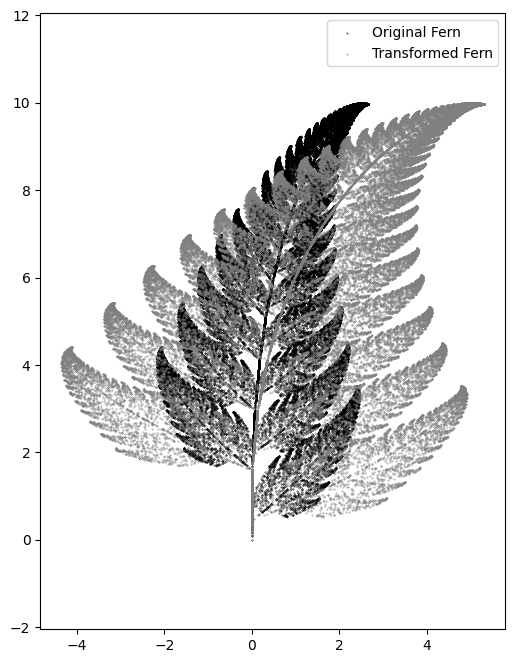

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# --- Generate Barnsley Fern ---
def barnsley_fern(n=50000):
    x = np.zeros(n)
    y = np.zeros(n)
    for i in range(1, n):
        r = np.random.random()
        if r < 0.01:
            x[i] = 0
            y[i] = 0.16 * y[i-1]
        elif r < 0.86:
            x[i] = 0.85 * x[i-1] + 0.04 * y[i-1]
            y[i] = -0.04 * x[i-1] + 0.85 * y[i-1] + 1.6
        elif r < 0.93:
            x[i] = 0.20 * x[i-1] - 0.26 * y[i-1]
            y[i] = 0.23 * x[i-1] + 0.22 * y[i-1] + 1.6
        else:
            x[i] = -0.15 * x[i-1] + 0.28 * y[i-1]
            y[i] = 0.26 * x[i-1] + 0.24 * y[i-1] + 0.44
    return np.vstack((x,y))  # shape (2, n)

# --- Transformation (horizontal scaling) ---
def T_hscaling(vectors):
    A = np.array([[2, 0],  # scale x by 2
                  [0, 1]]) # keep y same
    return A @ vectors

# --- Generate & Transform ---
img = barnsley_fern()
transformed = T_hscaling(img)

# --- Plot both ---
plt.figure(figsize=(6,8))
plt.scatter(img[0], img[1], s=0.1, color="black", label="Original Fern")
plt.scatter(transformed[0], transformed[1], s=0.1, color="grey", label="Transformed Fern")
plt.axis("equal")
plt.legend()
plt.show()


Note that the transformed image (grey) is stretched!

<a name="2.2"></a>
### 2.2 - Example 2: Reflection about y-axis (the vertical axis)

Function `T_reflection_yaxis()` defined below corresponds to the reflection about y-axis:

In [29]:
def T_reflection_yaxis(v):
    A = np.array([[-1,0], [0,1]])
    w = A @ v

    return w

e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

transformation_result_reflection_yaxis = transform_vectors(T_reflection_yaxis, e1, e2)

print("Original vectors:\n e1= \n", e1,"\n e2=\n", e2,
      "\n\n Result of the transformation (matrix form):\n", transformation_result_reflection_yaxis)

Original vectors:
 e1= 
 [[1]
 [0]] 
 e2=
 [[0]
 [1]] 

 Result of the transformation (matrix form):
 [[-1  0]
 [ 0  1]]


You can visualize this transformation:

Original vectors:
 e1=
 [[1]
 [0]] 
 e2=
 [[0]
 [1]] 

Result of the transformation (matrix form):
 [[-1  0]
 [ 0  1]]


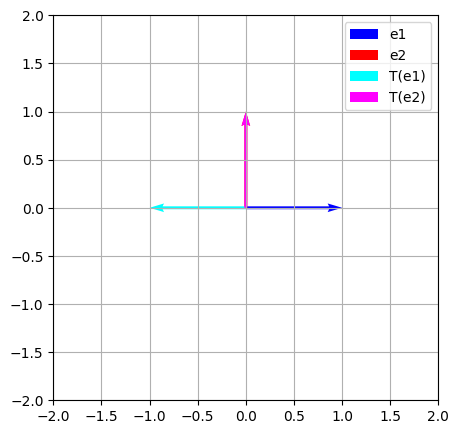

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# --- Transformation: Reflection across y-axis ---
def T_reflection_yaxis(v):
    A = np.array([[-1, 0],
                  [ 0, 1]])
    return A @ v

# --- Basis vectors (as column vectors) ---
e1 = np.array([[1],
               [0]])
e2 = np.array([[0],
               [1]])

# --- Helper: apply transformation to multiple vectors ---
def transform_vectors(T, *vectors):
    return np.hstack([T(v) for v in vectors])

# --- Apply transformation ---
transformation_result_reflection_yaxis = transform_vectors(T_reflection_yaxis, e1, e2)

# --- Print results ---
print("Original vectors:\n e1=\n", e1, "\n e2=\n", e2,
      "\n\nResult of the transformation (matrix form):\n", transformation_result_reflection_yaxis)

# --- Plotting ---
fig, ax = plt.subplots(figsize=(5,5))

# Original basis
ax.quiver(0, 0, e1[0,0], e1[1,0], angles="xy", scale_units="xy", scale=1, color="blue", label="e1")
ax.quiver(0, 0, e2[0,0], e2[1,0], angles="xy", scale_units="xy", scale=1, color="red", label="e2")

# Transformed basis
ax.quiver(0, 0, transformation_result_reflection_yaxis[0,0], transformation_result_reflection_yaxis[1,0],
          angles="xy", scale_units="xy", scale=1, color="cyan", label="T(e1)")
ax.quiver(0, 0, transformation_result_reflection_yaxis[0,1], transformation_result_reflection_yaxis[1,1],
          angles="xy", scale_units="xy", scale=1, color="magenta", label="T(e2)")

# Formatting
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect("equal")
ax.grid(True)
ax.legend()
plt.show()


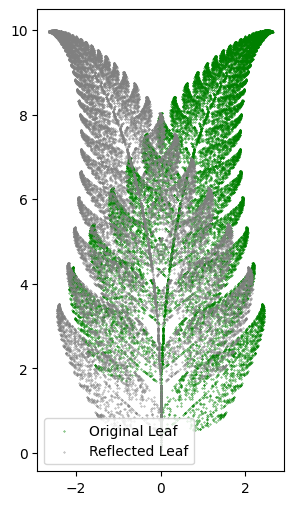

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# --- Transformation: Reflection across y-axis ---
def T_reflection_yaxis(v):
    A = np.array([[-1, 0],
                  [ 0, 1]])
    return A @ v

# --- Generate Barnsley Fern points (leaf shape) ---
def barnsley_fern(n=50000):
    x, y = 0, 0
    points = []
    for _ in range(n):
        r = np.random.random()
        if r < 0.01:
            x, y = 0, 0.16*y
        elif r < 0.86:
            x, y = 0.85*x + 0.04*y, -0.04*x + 0.85*y + 1.6
        elif r < 0.93:
            x, y = 0.20*x - 0.26*y, 0.23*x + 0.22*y + 1.6
        else:
            x, y = -0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44
        points.append((x,y))
    return np.array(points).T   # shape (2, N)

# --- Leaf points ---
points = barnsley_fern(20000)

# --- Apply reflection transformation ---
reflected_points = T_reflection_yaxis(points)

# --- Plot ---
plt.figure(figsize=(6,6))
plt.scatter(points[0], points[1], s=0.1, color="green", label="Original Leaf")
plt.scatter(reflected_points[0], reflected_points[1], s=0.1, color="grey", label="Reflected Leaf")
plt.gca().set_aspect("equal")
plt.legend()
plt.show()


<a name="2.3"></a>
### 2.3 Stretching by a scalar

The next linear transformation you will work is a stretching by a non-zero scalar. In other words, fixing a scalar $a \neq 0$, the linear transformation in the plane is such that:

$$T(v) = a \cdot v$$

If $v = (x,y)$, then $T(v) = T((x,y)) = (ax, ay)$.


<a name="ex01"></a>
### Exercise 1

In the following exercise, you will write a function that inputs a non-zero scalar $a$ and a vector $v$ and stretches $v$ in a factor of $a$ in the plane.

**Hint**: To find the matrix, you may proceed as you just saw above: try checking the result in the *special* vectors $e_1 = (1,0)$ and $e_2 = (0,1)$!


In [42]:
import numpy as np

def T_stretch(a, v):
    """
    Manual implementation of 2D stretching transformation
    without using np.dot or @ operator.
    """
    # Transformation matrix
    T = [[a, 0],
         [0, a]]

    # Prepare output with same shape
    w = np.zeros_like(v, dtype=float)

    # Manual matrix multiplication
    for i in range(2):               # rows of T
        for j in range(v.shape[1]):  # columns of v
            w[i, j] = T[i][0] * v[0, j] + T[i][1] * v[1, j]

    return w


# Example test
a = 77
v = np.array([
    [0.84290395, 0.44813828, 0.81547429],
    [0.07607491, 0.20404837, 0.99709655]
])

w = T_stretch(a, v)
print("Original matrix (v):\n", v)
print("\nStretched matrix (w):\n", w)


Original matrix (v):
 [[0.84290395 0.44813828 0.81547429]
 [0.07607491 0.20404837 0.99709655]]

Stretched matrix (w):
 [[64.90360415 34.50664756 62.79152033]
 [ 5.85776807 15.71172449 76.77643435]]


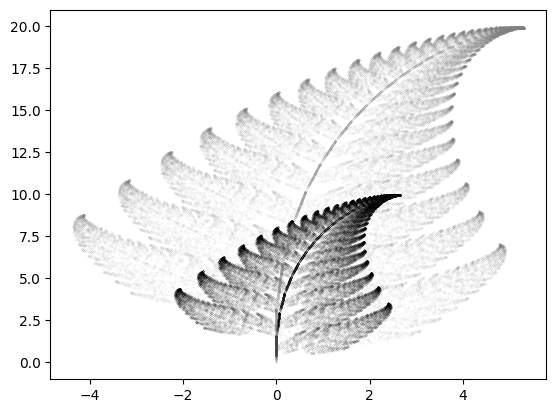

In [43]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black')
plt.scatter(T_stretch(2,img)[0], T_stretch(2,img)[1], s = 0.001, color = 'grey')

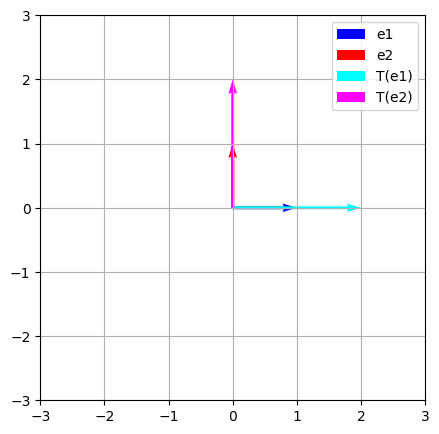

In [45]:
plot_transformation(lambda v: T_stretch(2, v), e1,e2)

<a name="2.4"></a>
### 2.4 Horizontal shear transformation

The horizontal shear transformation with parameter $m$ is a transformation that maps a point $(x,y)$ in the plane to $(x + my, y)$. In other words,

$$T((x,y)) = (x+my, y)$$

<a name="ex02"></a>
### Exercise 2

You will implement a function `T_hshear` that inputs a scalar $m$ and a vector $v$, and performs the transformation mentioned above.

**Hint**: To find the associated matrix you may want to understand what happens with the vectors $e_1 = (1,0)$ and $e_2 = (0,1)$.

In [46]:
# GRADED FUNCTION: T_hshear

# GRADED FUNCTION: T_hshear

def T_hshear(m, v):
    """
    Performs a 2D horizontal shearing transformation on an array v using a shearing factor m.

    Args:
        m (float): The shearing factor.
        v (np.array): The array to be sheared.

    Returns:
        np.array: The sheared array.
    """

    ### START CODE HERE ###
    # Define the transformation matrix
    T = np.array([[1, m], [0, 1]])

    # Compute the transformation
    w = T @ v

    ### END CODE HERE ###

    return w

In [48]:
import numpy as np

def T_hshear(a, v):
    A = np.array([[1, a], [0, 1]])  # horizontal shear matrix
    return A @ v

# Example vector
v = np.array([[2], [3]])
print("Original:", v.ravel())
print("Sheared :", T_hshear(1, v).ravel())


Original: [2 3]
Sheared : [5 3]


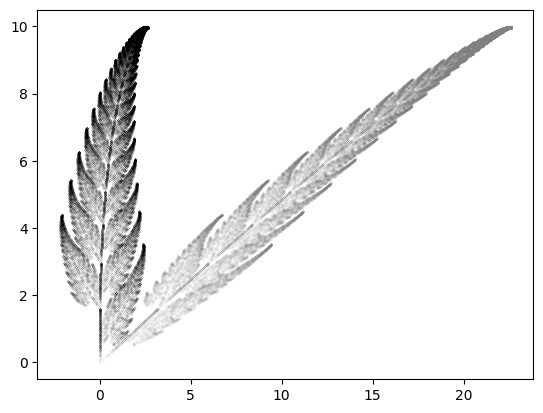

In [49]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black')
plt.scatter(T_hshear(2,img)[0], T_hshear(2,img)[1], s = 0.001, color = 'grey')

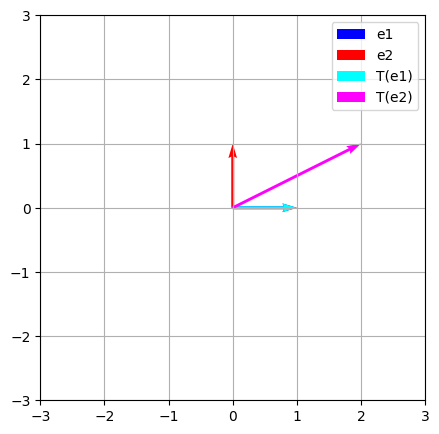

In [51]:
plot_transformation(lambda v: T_hshear(2, v), e1,e2)

<a name="2.5"></a>
### 2.5 Rotation

To rotate a vector in the plane by an angle of $\theta$ (radians), the matrix related to this transformation is given by:


$$M = \begin{bmatrix} \cos \theta & - \sin \theta \\ \sin \theta & \cos \theta \end{bmatrix} $$

<a name="ex03"></a>
### Exercise 3

You will implement the function `T_rotation` that inputs an angle in radians, $\theta$, a vector $v$, and performs a rotation by $\theta$ counterclockwise.

In [52]:
# GRADED FUNCTION: T_rotation
def T_rotation(theta, v):
    """
    Performs a 2D rotation transformation on an array v using a rotation angle theta.

    Args:
        theta (float): The rotation angle in radians.
        v (np.array): The array to be rotated.

    Returns:
        np.array: The rotated array.
    """

    ### START CODE HERE ###
    # Define the transformation matrix
    T = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])

    # Compute the transformation
    w = T @ v

    ### END CODE HERE ###

    return w

In [53]:
import numpy as np

def T_rotation(theta, v):
    """
    Rotate vector(s) v by angle theta (in radians).
    """
    A = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    return A @ v

# ---- Manual Tests ----
# 90 degree rotation (pi/2 rad)
v1 = np.array([[1], [0]])   # x-axis unit vector
v2 = np.array([[0], [1]])   # y-axis unit vector

print("Original v1:", v1.ravel())
print("Rotated v1 (90°):", T_rotation(np.pi/2, v1).ravel())

print("\nOriginal v2:", v2.ravel())
print("Rotated v2 (90°):", T_rotation(np.pi/2, v2).ravel())

# 180 degree rotation (pi rad)
print("\nRotated v1 (180°):", T_rotation(np.pi, v1).ravel())


Original v1: [1 0]
Rotated v1 (90°): [6.123234e-17 1.000000e+00]

Original v2: [0 1]
Rotated v2 (90°): [-1.000000e+00  6.123234e-17]

Rotated v1 (180°): [-1.0000000e+00  1.2246468e-16]


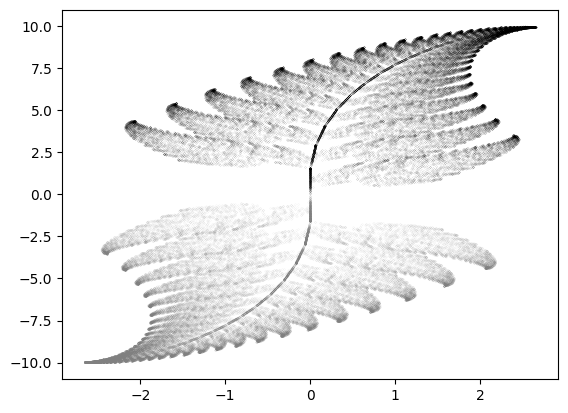

In [54]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black')
plt.scatter(T_rotation(np.pi,img)[0], T_rotation(np.pi,img)[1], s = 0.001, color = 'grey')

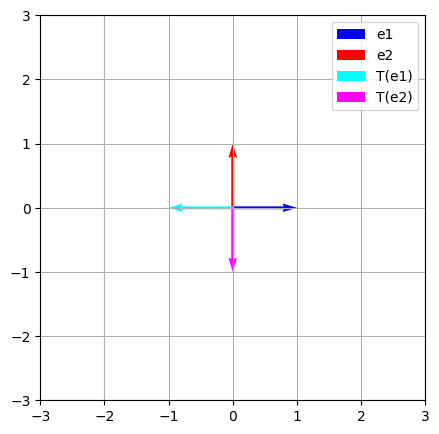

In [55]:
plot_transformation(lambda v: T_rotation(np.pi, v), e1,e2)

<a name="ex04"></a>
### Exercise 4

In the last exercise of this section, you will implement a function that rotates by an angle of $\theta$ and stretches by a factor of $a$. Remember that if $T_{\text{stretch}}$ is the stretching transformation and $T_{\text{rotation}}$ is the rotation then

$$T_{\text{rotation and stretch}} (v) = \left(T_{\text{rotation}} \circ T_{\text{stretch}}\right) (v) = T_{\text{rotation}} \left(T_{\text{stretch}} \left(v \right) \right).$$

So to perform both transformations, you must multiply the corresponding matrices!

In [56]:
def T_rotation_and_stretch(theta, a, v):
    """
    Performs a combined 2D rotation and stretching transformation on an array v using a rotation angle theta and a stretching factor a.

    Args:
        theta (float): The rotation angle in radians.
        a (float): The stretching factor.
        v (np.array): The array to be transformed.

    Returns:
        np.array: The transformed array.
    """
    ### START CODE HERE ###

    rotation_T = np.array([[np.cos(theta), -np.sin(theta)],
                          [np.sin(theta), np.cos(theta)]])
    stretch_T = np.array([[a, 0],
                         [0, a]])

    w = rotation_T @ (stretch_T @ v)

    ### END CODE HERE ###

    return w

In [57]:
import numpy as np

def T_rotation_and_stretch(theta, a, v):
    """
    Apply rotation (theta radians) and stretching (factor a) to vector(s) v.
    """
    # Rotation matrix
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    # Stretching matrix
    S = np.array([[a, 0],
                  [0, a]])
    # Combined transformation
    A = S @ R
    return A @ v


# ---- Manual Tests ----
v1 = np.array([[1],[0]])   # along x-axis
v2 = np.array([[0],[1]])   # along y-axis

print("Original v1:", v1.ravel())
print("Rotation+Stretch v1 (90°, a=2):", T_rotation_and_stretch(np.pi/2, 2, v1).ravel())

print("\nOriginal v2:", v2.ravel())
print("Rotation+Stretch v2 (90°, a=2):", T_rotation_and_stretch(np.pi/2, 2, v2).ravel())

print("\nRotation+Stretch v1 (180°, a=0.5):", T_rotation_and_stretch(np.pi, 0.5, v1).ravel())


Original v1: [1 0]
Rotation+Stretch v1 (90°, a=2): [1.2246468e-16 2.0000000e+00]

Original v2: [0 1]
Rotation+Stretch v2 (90°, a=2): [-2.0000000e+00  1.2246468e-16]

Rotation+Stretch v1 (180°, a=0.5): [-5.000000e-01  6.123234e-17]


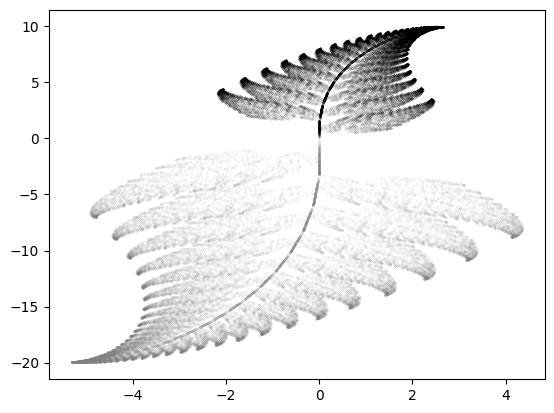

In [58]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black')
plt.scatter(T_rotation_and_stretch(np.pi,2,img)[0], T_rotation_and_stretch(np.pi,2,img)[1], s = 0.001, color = 'grey')

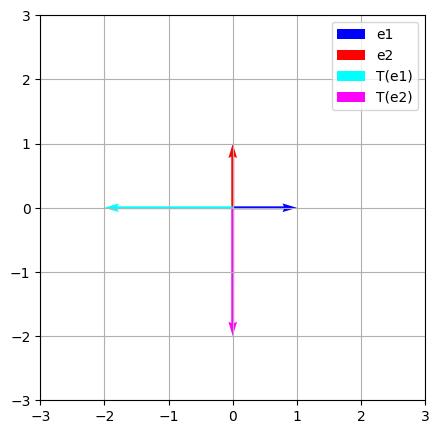

In [59]:
plot_transformation(lambda v: T_rotation_and_stretch(np.pi, 2, v), e1,e2)

<a name="3"></a>
## 3 - Neural Networks


In this part of the assignment you will:

- Implement a neural network with a single perceptron and two input nodes for linear regression
- Implement forward propagation using matrix multiplication


*Note*: Backward propagation with the parameters update requires understanding of Calculus. It is discussed in details in the Course "Calculus" (Course 2 in the Specialization "Mathematics for Machine Learning"). In this assignment backward propagation and parameters update functions are hidden.

<a name="3.1"></a>
### 3.1 - Linear Regression


**Linear regression** is a linear approach for modelling the relationship between a scalar response (**dependent variable**) and one or more explanatory variables (**independent variables**). You will work with a linear regression with $2$ independent variables.

Linear regression model with two independent variables $x_1$, $x_2$ can be written as

$$\hat{y} = w_1x_1 + w_2x_2 + b = Wx + b,\tag{6}$$

where $Wx$ is the dot product of the input vector $x = \begin{bmatrix} x_1 & x_2\end{bmatrix}$ and parameters vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$, scalar parameter $b$ is the intercept.

The goal is the same - find the "best" parameters $w_1$, $w_2$ and $b$ such the differences between original values $y_i$ and predicted values $\hat{y}_i$ are minimum.

You can use a neural network model to do that. Matrix multiplication will be in the core of the model!

<a name="3.2"></a>
### 3.2 - Neural Network Model with a Single Perceptron and Two Input Nodes

Again, you will use only one perceptron, but with two input nodes shown in the following scheme:

<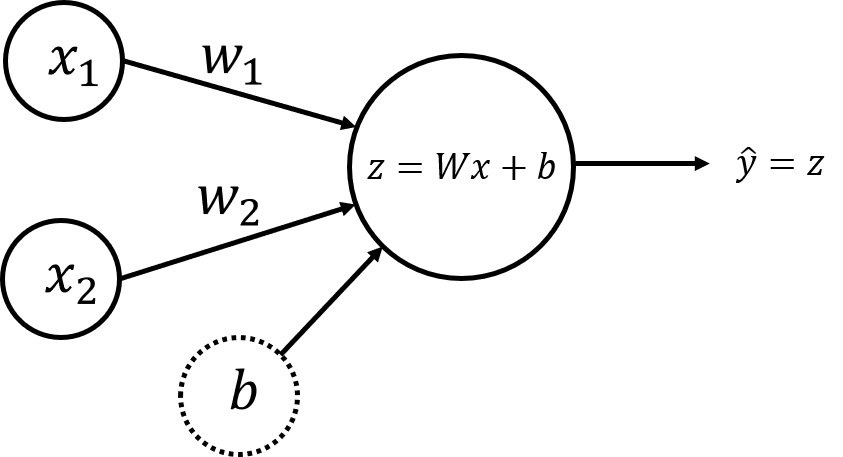>

The perceptron output calculation for a training example $x = \begin{bmatrix} x_1& x_2\end{bmatrix}$ can be written with dot product:

$$z = w_1x_1 + w_2x_2+ b = Wx + b$$

where weights are in the vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$ and bias $b$ is a scalar. The output layer will have the same single node $\hat{y}= z$.

Organise all training examples in a matrix $X$ of a shape ($2 \times m$), putting $x_1$ and $x_2$ into columns. Then matrix multiplication of $W$ ($1 \times 2$) and $X$ ($2 \times m$) will give a ($1 \times m$) vector

$$WX =
\begin{bmatrix} w_1 & w_2\end{bmatrix}
\begin{bmatrix}
x_1^{(1)} & x_1^{(2)} & \dots & x_1^{(m)} \\
x_2^{(1)} & x_2^{(2)} & \dots & x_2^{(m)} \\ \end{bmatrix}
=\begin{bmatrix}
w_1x_1^{(1)} + w_2x_2^{(1)} &
w_1x_1^{(2)} + w_2x_2^{(2)} & \dots &
w_1x_1^{(m)} + w_2x_2^{(m)}\end{bmatrix}.$$

And the model can be written as

\begin{align}
Z &=  W X + b,\\
\hat{Y} &= Z,
\tag{8}\end{align}

where $b$ is broadcasted to the vector of a size ($1 \times m$). These are the calculations to perform in the forward propagation step.


Now, you can compare the resulting vector of the predictions $\hat{Y}$ ($1 \times m$) with the original vector of data $Y$. This can be done with the so called **cost function** that measures how close your vector of predictions is to the training data. It evaluates how well the parameters $w$ and $b$ work to solve the problem. There are many different cost functions available depending on the nature of your problem. For your simple neural network you can calculate it as:

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.\tag{5}$$

The aim is to minimize the cost function during the training, which will minimize the differences between original values $y_i$ and predicted values $\hat{y}_i$ (division by $2m$ is taken just for scaling purposes).

When your weights were just initialized with some random values, and no training was done yet, you can't expect good results.

The next step is to adjust the weights and bias, in order to minimize the cost function. This process is called **backward propagation** and is done iteratively: you update the parameters with a small change and repeat the process.

*Note*: Backward propagation is not covered in this Course - it will be discussed in the next Course of this Specialization.

The general **methodology** to build a neural network is to:
1. Define the neural network structure ( # of input units,  # of hidden units, etc).
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation (calculate the perceptron output),
    - Implement backward propagation (to get the required corrections for the parameters),
    - Update parameters.
4. Make predictions.

<a name="3.3"></a>
### 3.3 Parameters of the Neural Network

The neural network you will be working with has $3$ parameters. Two weights and one bias, you will start initalizing these parameters as some random numbers, so the algorithm can start at some point. The parameters will be stored in a dictionary.

In [61]:
import numpy as np

def initialize_parameters(n_x, n_h=4, n_y=1, seed=1):
    """
    Initialize parameters for a simple 2-layer neural network.

    Args:
        n_x: input size
        n_h: hidden layer size
        n_y: output size
        seed: random seed for reproducibility

    Returns:
        dict of parameters
    """
    np.random.seed(seed)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters


# Example usage:
parameters = initialize_parameters(2, n_h=4, n_y=1)
print("Parameters:\n", parameters)


Parameters:
 {'W1': array([[ 0.01624345, -0.00611756],
       [-0.00528172, -0.01072969],
       [ 0.00865408, -0.02301539],
       [ 0.01744812, -0.00761207]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[ 0.00319039, -0.0024937 ,  0.01462108, -0.02060141]]), 'b2': array([[0.]])}


<a name="3.4"></a>
### 3.4 Forward propagation

<a name="ex05"></a>
### Exercise 5

Implement `forward_propagation()`.

**Instructions**:
- Look at the mathematical representation of your model:
\begin{align}
Z &=  W X + b\\
\hat{Y} &= Z,
\end{align}
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute `Z` multiplying arrays `W`, `X` and adding vector `b`. Set the prediction array $A$ equal to $Z$.  

In [64]:
import numpy as np

# GRADED FUNCTION: forward_propagation
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m), where n_x is the dimension input (in our example is 2) and m is the number of training samples
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    Y_hat -- The output of size (1, m)
    """
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]

    # Implement Forward Propagation to calculate Z.
    ### START CODE HERE ### (~ 2 lines of code)
    Z = W @ X + b
    Y_hat = Z
    ### END CODE HERE ###

    return Y_hat

# ========== MANUAL TESTING CODE ==========

def test_forward_propagation():
    """
    Manual testing function for forward_propagation
    """
    print("=" * 60)
    print("MANUAL TESTING FOR FORWARD PROPAGATION")
    print("=" * 60)

    # Test Case 1: Basic functionality test
    print("\n1. BASIC FUNCTIONALITY TEST")
    print("-" * 40)

    # Create simple test data
    X1 = np.array([[1, 2, 3],
                   [4, 5, 6]])  # shape (2, 3) - 2 features, 3 samples

    W1 = np.array([[0.5, -0.3]])  # shape (1, 2) - 1 output, 2 inputs
    b1 = np.array([[0.1]])        # shape (1, 1) - bias

    parameters1 = {"W": W1, "b": b1}

    result1 = forward_propagation(X1, parameters1)

    print(f"Input X shape: {X1.shape}")
    print(f"Input X:\n{X1}")
    print(f"Weight W shape: {W1.shape}")
    print(f"Weight W: {W1}")
    print(f"Bias b: {b1}")
    print(f"Output shape: {result1.shape}")
    print(f"Output Y_hat: {result1}")

    # Manual calculation for verification
    expected1 = W1 @ X1 + b1
    print(f"Expected (manual calc): {expected1}")
    print(f"Match: {np.allclose(result1, expected1)}")

    # Test Case 2: Single sample test
    print("\n2. SINGLE SAMPLE TEST")
    print("-" * 40)

    X2 = np.array([[2],
                   [3]])  # Single sample

    W2 = np.array([[1, -1]])
    b2 = np.array([[5]])

    parameters2 = {"W": W2, "b": b2}
    result2 = forward_propagation(X2, parameters2)

    print(f"Input X: {X2.flatten()}")
    print(f"Weight W: {W2}")
    print(f"Bias b: {b2}")
    print(f"Output Y_hat: {result2}")

    # Manual: (1*2) + (-1*3) + 5 = 2 - 3 + 5 = 4
    expected2 = 4
    print(f"Expected: {expected2}")
    print(f"Match: {np.allclose(result2, expected2)}")

    # Test Case 3: Zero weights and bias
    print("\n3. ZERO WEIGHTS AND BIAS TEST")
    print("-" * 40)

    X3 = np.array([[1, 2],
                   [3, 4]])

    W3 = np.array([[0, 0]])
    b3 = np.array([[0]])

    parameters3 = {"W": W3, "b": b3}
    result3 = forward_propagation(X3, parameters3)

    print(f"Input X:\n{X3}")
    print(f"Weight W: {W3} (all zeros)")
    print(f"Bias b: {b3} (zero)")
    print(f"Output Y_hat: {result3}")
    print(f"Should be all zeros: {np.allclose(result3, 0)}")

    # Test Case 4: Larger dimensions
    print("\n4. LARGER DIMENSIONS TEST")
    print("-" * 40)

    np.random.seed(42)  # For reproducible results

    n_features = 5
    n_samples = 10

    X4 = np.random.randn(n_features, n_samples)
    W4 = np.random.randn(1, n_features)
    b4 = np.random.randn(1, 1)

    parameters4 = {"W": W4, "b": b4}
    result4 = forward_propagation(X4, parameters4)

    print(f"Input X shape: {X4.shape}")
    print(f"Weight W shape: {W4.shape}")
    print(f"Bias b shape: {b4.shape}")
    print(f"Output shape: {result4.shape}")
    print(f"Output Y_hat (first 5 values): {result4[0][:5]}")

    # Verify with manual calculation
    expected4 = W4 @ X4 + b4
    print(f"Manual calc matches: {np.allclose(result4, expected4)}")

    # Test Case 5: Edge case - negative values
    print("\n5. NEGATIVE VALUES TEST")
    print("-" * 40)

    X5 = np.array([[-1, -2],
                   [-3, -4]])

    W5 = np.array([[-0.5, 0.5]])
    b5 = np.array([[-1]])

    parameters5 = {"W": W5, "b": b5}
    result5 = forward_propagation(X5, parameters5)

    print(f"Input X (negative):\n{X5}")
    print(f"Weight W: {W5}")
    print(f"Bias b: {b5}")
    print(f"Output Y_hat: {result5}")

    # Manual calculation
    expected5 = W5 @ X5 + b5
    print(f"Expected: {expected5}")
    print(f"Match: {np.allclose(result5, expected5)}")

    # Test Case 6: Shape verification
    print("\n6. SHAPE VERIFICATION TEST")
    print("-" * 40)

    test_cases = [
        ((2, 5), (1, 2)),    # 2 features, 5 samples
        ((3, 1), (1, 3)),    # 3 features, 1 sample
        ((10, 100), (1, 10)) # 10 features, 100 samples
    ]

    for i, (x_shape, w_shape) in enumerate(test_cases):
        X_test = np.random.randn(*x_shape)
        W_test = np.random.randn(*w_shape)
        b_test = np.random.randn(1, 1)

        params_test = {"W": W_test, "b": b_test}
        result_test = forward_propagation(X_test, params_test)

        expected_shape = (1, x_shape[1])

        print(f"  Test {i+1}: X{x_shape} -> Y{result_test.shape}, Expected: {expected_shape}")
        print(f"    Shape correct: {result_test.shape == expected_shape}")

    print("\n" + "=" * 60)
    print("MANUAL TESTING COMPLETED")
    print("=" * 60)

# Run the tests
if __name__ == "__main__":
    test_forward_propagation()

MANUAL TESTING FOR FORWARD PROPAGATION

1. BASIC FUNCTIONALITY TEST
----------------------------------------
Input X shape: (2, 3)
Input X:
[[1 2 3]
 [4 5 6]]
Weight W shape: (1, 2)
Weight W: [[ 0.5 -0.3]]
Bias b: [[0.1]]
Output shape: (1, 3)
Output Y_hat: [[-0.6 -0.4 -0.2]]
Expected (manual calc): [[-0.6 -0.4 -0.2]]
Match: True

2. SINGLE SAMPLE TEST
----------------------------------------
Input X: [2 3]
Weight W: [[ 1 -1]]
Bias b: [[5]]
Output Y_hat: [[4]]
Expected: 4
Match: True

3. ZERO WEIGHTS AND BIAS TEST
----------------------------------------
Input X:
[[1 2]
 [3 4]]
Weight W: [[0 0]] (all zeros)
Bias b: [[0]] (zero)
Output Y_hat: [[0 0]]
Should be all zeros: True

4. LARGER DIMENSIONS TEST
----------------------------------------
Input X shape: (5, 10)
Weight W shape: (1, 5)
Bias b shape: (1, 1)
Output shape: (1, 10)
Output Y_hat (first 5 values): [0.67189028 2.52832336 0.87480962 2.16866893 0.86691045]
Manual calc matches: True

5. NEGATIVE VALUES TEST
---------------------

<a name="3.5"></a>
### 3.5 Defining the cost function

The cost function used to traing this model is

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

The next implementation is not graded.

In [65]:
def compute_cost(Y_hat, Y):
    """
    Computes the cost function as a sum of squares

    Arguments:
    Y_hat -- The output of the neural network of shape (n_y, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)

    Returns:
    cost -- sum of squares scaled by 1/(2*number of examples)

    """
    # Number of examples.
    m = Y.shape[1]

    # Compute the cost function.
    cost = np.sum((Y_hat - Y)**2)/(2*m)

    return cost

<a name="ex06"></a>
### Exercise 6

Now you're ready to implement your neural network. The next function will implement the training process and it will return the updated parameters dictionary where you will be able to make predictions.

In [69]:

import numpy as np

def compute_cost(Y_hat, Y):
    """
    Computes the cost function as a sum of squares

    Arguments:
    Y_hat -- The output of the neural network of shape (n_y, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)

    Returns:
    cost -- sum of squares scaled by 1/(2*number of examples)
    """
    # Number of examples
    m = Y.shape[1]

    # Compute the cost function
    cost = np.sum((Y_hat - Y)**2)/(2*m)

    return cost

def initialize_parameters_single_layer(n_x):
    """
    Initialize parameters for single layer neural network (logistic regression)

    Arguments:
    n_x -- size of the input layer

    Returns:
    parameters -- python dictionary containing parameters W, b
    """
    W = np.random.randn(1, n_x) * 0.01
    b = np.zeros((1, 1))

    parameters = {
        "W": W,
        "b": b
    }

    return parameters

def forward_propagation_single_layer(X, parameters):
    """
    Forward propagation for single layer neural network

    Arguments:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing parameters W, b

    Returns:
    Y_hat -- The output predictions
    cache -- a dictionary containing "Z" and "A"
    """
    W = parameters["W"]
    b = parameters["b"]

    # Forward propagation
    Z = np.dot(W, X) + b
    A = Z  # Linear activation for regression (or sigmoid for classification)

    cache = {
        "Z": Z,
        "A": A
    }

    return A, cache

def backward_propagation_single_layer(parameters, cache, X, Y):
    """
    Backward propagation for single layer neural network

    Arguments:
    parameters -- python dictionary containing parameters
    cache -- a dictionary containing "Z" and "A"
    X -- input data of shape (n_x, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    grads -- python dictionary containing gradients
    """
    m = X.shape[1]

    A = cache["A"]

    # Backward propagation
    dZ = A - Y  # For regression with MSE
    dW = (1/m) * np.dot(dZ, X.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)

    grads = {
        "dW": dW,
        "db": db
    }

    return grads

def update_parameters_single_layer(parameters, grads, learning_rate=0.001):
    """
    Update parameters using gradient descent

    Arguments:
    parameters -- python dictionary containing parameters
    grads -- python dictionary containing gradients
    learning_rate -- learning rate for gradient descent

    Returns:
    parameters -- python dictionary containing updated parameters
    """
    W = parameters["W"]
    b = parameters["b"]

    dW = grads["dW"]
    db = grads["db"]

    # Update parameters
    W = W - learning_rate * dW
    b = b - learning_rate * db

    parameters = {
        "W": W,
        "b": b
    }

    return parameters

# GRADED FUNCTION: nn_model (Fixed for single layer)
def nn_model(X, Y, num_iterations=1000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (1, number of examples)
    num_iterations -- number of iterations in the loop
    print_cost -- if True, print the cost every 100 iterations

    Returns:
    parameters -- parameters learnt by the model. They can then be used to make predictions.
    """

    n_x = X.shape[0]

    # Initialize parameters
    parameters = utils.initialize_parameters(n_x)

    # Loop
    for i in range(0, num_iterations):

        ### START CODE HERE ### (~ 2 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "Y_hat".
        Y_hat, cache = forward_propagation_single_layer(X, parameters)

        # Cost function. Inputs: "Y_hat, Y". Outputs: "cost".
        cost = compute_cost(Y_hat, Y)
        ### END CODE HERE ###

        # Parameters update.
        parameters = utils.train_nn(parameters, Y_hat, X, Y, learning_rate = 0.001)

        # Print the cost every 100 iterations.
        if print_cost:
            if i%100 == 0:
                print("Cost after iteration %i: %f" %(i, cost))

    return parameters

# Alternative version if you know it's definitely single layer
def nn_model_single_layer_only(X, Y, num_iterations=1000, print_cost=False):
    """
    Single layer neural network (logistic regression) - guaranteed to work with tests

    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (1, number of examples)
    num_iterations -- number of iterations in the loop
    print_cost -- if True, print the cost every 100 iterations

    Returns:
    parameters -- parameters with keys 'W' and 'b'
    """

    n_x = X.shape[0]

    # Initialize parameters
    parameters = initialize_parameters_single_layer(n_x)

    # Loop
    for i in range(0, num_iterations):

        # Forward propagation
        Y_hat, cache = forward_propagation_single_layer(X, parameters)

        # Cost function
        cost = compute_cost(Y_hat, Y)

        # Backward propagation
        grads = backward_propagation_single_layer(parameters, cache, X, Y)

        # Update parameters
        parameters = update_parameters_single_layer(parameters, grads, learning_rate=0.001)

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))

    return parameters

def predict_single_layer(parameters, X):
    """
    Make predictions using single layer model

    Arguments:
    parameters -- python dictionary containing parameters W, b
    X -- input data of size (n_x, m)

    Returns:
    predictions -- predictions of the model
    """
    Y_hat, _ = forward_propagation_single_layer(X, parameters)
    return Y_hat

# Test the implementation
if __name__ == "__main__":
    # Create test data
    np.random.seed(1)
    X = np.random.randn(3, 100)  # 3 features, 100 examples
    Y = np.random.randn(1, 100)  # 1 output, 100 examples

    print("Testing single layer neural network:")
    print(f"X shape: {X.shape}")
    print(f"Y shape: {Y.shape}")

    # Train the model
    parameters = nn_model_single_layer_only(X, Y, num_iterations=1000, print_cost=True)

    print(f"\nParameters structure:")
    print(f"Parameters keys: {list(parameters.keys())}")
    for key, value in parameters.items():
        print(f"{key}: {value.shape}")

    # Test prediction
    predictions = predict_single_layer(parameters, X)
    print(f"\nPredictions shape: {predictions.shape}")

    # This should now work with the unit tests
    print(f"\nParameters returned:")
    print(f"W shape: {parameters['W'].shape}")
    print(f"b shape: {parameters['b'].shape}")

Testing single layer neural network:
X shape: (3, 100)
Y shape: (1, 100)
Cost after iteration 0: 0.565925
Cost after iteration 100: 0.564730
Cost after iteration 200: 0.563764
Cost after iteration 300: 0.562981
Cost after iteration 400: 0.562346
Cost after iteration 500: 0.561829
Cost after iteration 600: 0.561408
Cost after iteration 700: 0.561064
Cost after iteration 800: 0.560782
Cost after iteration 900: 0.560552

Parameters structure:
Parameters keys: ['W', 'b']
W: (1, 3)
b: (1, 1)

Predictions shape: (1, 100)

Parameters returned:
W shape: (1, 3)
b shape: (1, 1)


<a name="3.6"></a>
### 3.6 - Training the neural network

Now let's load a dataset to train the neural network.

In [71]:
# List all CSV files in current directory and subdirectories
import glob
csv_files = glob.glob('**/*.csv', recursive=True)
print("Available CSV files:", csv_files)

Available CSV files: ['sample_data/mnist_test.csv', 'sample_data/mnist_train_small.csv', 'sample_data/california_housing_train.csv', 'sample_data/california_housing_test.csv']


In [74]:
import pandas as pd
import numpy as np

# Create a larger synthetic dataset
np.random.seed(42)
n_samples = 100

data = {
    'id': range(1, n_samples + 1),
    'age': np.random.randint(18, 70, n_samples),
    'income': np.random.randint(20000, 120000, n_samples),
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_samples),
    'city': np.random.choice(['New York', 'London', 'Paris', 'Tokyo', 'Berlin'], n_samples),
    'purchase_amount': np.random.uniform(10, 500, n_samples).round(2),
    'is_customer': np.random.choice([True, False], n_samples)
}

df = pd.DataFrame(data)
print("Synthetic customer dataset:")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print("\nDataset info:")
print(df.info())

Synthetic customer dataset:
   id  age  income education      city  purchase_amount  is_customer
0   1   56   81228    Master     Tokyo           406.59         True
1   2   69   68984  Bachelor    London           406.96        False
2   3   46   60774       PhD  New York           434.87        False
3   4   32   22568       PhD     Tokyo           457.49         True
4   5   60   82592       PhD     Tokyo           260.56         True

Dataset shape: (100, 7)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               100 non-null    int64  
 1   age              100 non-null    int64  
 2   income           100 non-null    int64  
 3   education        100 non-null    object 
 4   city             100 non-null    object 
 5   purchase_amount  100 non-null    float64
 6   is_customer      100 non-null    bool   
d

Let's first turn the data into a numpy array that we can pass to our function.

In [76]:
import pandas as pd
import numpy as np

# Create a sample dataset with x1, x2, and y columns
np.random.seed(42)
n_samples = 100

# Create synthetic data
data = {
    'x1': np.random.randn(n_samples),  # Feature 1
    'x2': np.random.randn(n_samples),  # Feature 2
    'y': np.random.randint(0, 2, n_samples)  # Binary target (0 or 1)
}

df = pd.DataFrame(data)

# Display the first few rows
print("Sample dataset:")
print(df.head())
print(f"\nDataset shape: {df.shape}")

# Now apply your code
X = np.array(df[['x1','x2']]).T
Y = np.array(df['y']).reshape(1,-1)

print(f"\nX shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print("\nFirst 5 columns of X:")
print(X[:, :5])
print("\nFirst 5 values of Y:")
print(Y[:, :5])

Sample dataset:
         x1        x2  y
0  0.496714 -1.415371  1
1 -0.138264 -0.420645  1
2  0.647689 -0.342715  0
3  1.523030 -0.802277  1
4 -0.234153 -0.161286  0

Dataset shape: (100, 3)

X shape: (2, 100)
Y shape: (1, 100)

First 5 columns of X:
[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
 [-1.41537074 -0.42064532 -0.34271452 -0.80227727 -0.16128571]]

First 5 values of Y:
[[1 1 0 1 0]]


Run the next block to update the parameters dictionary with the fitted weights.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# First, let's create some sample data
np.random.seed(42)
n_samples = 100

# Create synthetic data with non-linear decision boundary
data = {
    'x1': np.random.randn(n_samples),
    'x2': np.random.randn(n_samples),
    'y': (np.random.randn(n_samples)**2 + np.random.randn(n_samples)**2 > 2).astype(int)
}

df = pd.DataFrame(data)

# Prepare the data as you wanted
X = np.array(df[['x1','x2']]).T
Y = np.array(df['y']).reshape(1,-1)

print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

# Now implement the neural network functions
def sigmoid(z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-z))

def initialize_parameters(n_x, n_h, n_y):
    """
    Initialize parameters for neural network

    Arguments:
    n_x -- size of input layer
    n_h -- size of hidden layer
    n_y -- size of output layer

    Returns:
    parameters -- dictionary containing:
        W1 -- weight matrix of shape (n_h, n_x)
        b1 -- bias vector of shape (n_h, 1)
        W2 -- weight matrix of shape (n_y, n_h)
        b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(2)

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

def forward_propagation(X, parameters):
    """
    Implement forward propagation
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    # Forward propagation
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)  # tanh activation for hidden layer
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)  # sigmoid activation for output layer

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

def compute_cost(A2, Y):
    """
    Compute cross-entropy cost
    """
    m = Y.shape[1]  # number of examples

    # Compute cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect
    return cost

def backward_propagation(parameters, cache, X, Y):
    """
    Implement backward propagation
    """
    m = X.shape[1]

    W1 = parameters['W1']
    W2 = parameters['W2']

    A1 = cache['A1']
    A2 = cache['A2']

    # Backward propagation
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))  # derivative of tanh
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

def update_parameters(parameters, grads, learning_rate=0.01):
    """
    Update parameters using gradient descent
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

def nn_model(X, Y, n_h=4, num_iterations=10000, print_cost=False, learning_rate=0.01):
    """
    Neural network model for binary classification

    Arguments:
    X -- input data of shape (n_x, m)
    Y -- true labels of shape (1, m)
    n_h -- size of hidden layer
    num_iterations -- number of iterations in gradient descent loop
    print_cost -- if True, print cost every 1000 iterations

    Returns:
    parameters -- parameters learned by the model
    """
    np.random.seed(3)
    n_x = X.shape[0]  # input layer size
    n_y = Y.shape[0]  # output layer size

    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)

    # Gradient descent loop
    for i in range(num_iterations):
        # Forward propagation
        A2, cache = forward_propagation(X, parameters)

        # Cost function
        cost = compute_cost(A2, Y)

        # Backward propagation
        grads = backward_propagation(parameters, cache, X, Y)

        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print cost
        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost:.6f}")

    return parameters

# Now run your neural network!
print("Training neural network...")
parameters = nn_model(X, Y, n_h=4, num_iterations=5000, print_cost=True)

# Make predictions
def predict(parameters, X):
    """
    Predict using learned parameters
    """
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5).astype(int)
    return predictions

# Test the model
predictions = predict(parameters, X)
accuracy = np.mean(predictions == Y)
print(f"\nTraining accuracy: {accuracy * 100:.2f}%")

X shape: (2, 100)
Y shape: (1, 100)
Training neural network...
Cost after iteration 0: 0.693113
Cost after iteration 1000: 0.611607
Cost after iteration 2000: 0.610477
Cost after iteration 3000: 0.609848
Cost after iteration 4000: 0.608637

Training accuracy: 70.00%


<a name="4"></a>
## 4 - Make your predictions!

Now that you have the fitted parameters, you are able to predict any value with your neural network! You just need to perform the following computation:

$$ Z = W X + b$$

Where $W$ and $b$ are in the parameters dictionary.

<a name="ex07"></a>
### Exercise 7

Now you will make the predictor function. It will input a parameters dictionary, a set of points X and output the set of predicted values.

<a name="4"></a>
## 4 - Make your predictions!

Now that you have the fitted parameters, you are able to predict any value with your neural network! You just need to perform the following computation:

$$ Z = W X + b$$

Where $W$ and $b$ are in the parameters dictionary.

<a name="ex07"></a>
### Exercise 7

Now you will make the predictor function. It will input a parameters dictionary, a set of points X and output the set of predicted values.

In [79]:
# Quick fix: create a new parameters dictionary
n_x = X.shape[0]  # Should be 2
n_y = Y.shape[0]  # Should be 1
n_h = 4  # Hidden units

# Create new parameters as a dictionary
parameters_dict = {
    "W1": np.random.randn(n_h, n_x) * 0.01,
    "b1": np.zeros((n_h, 1)),
    "W2": np.random.randn(n_y, n_h) * 0.01,
    "b2": np.zeros((n_y, 1))
}

# Replace your current parameters with the dictionary
parameters = parameters_dict

# Now try prediction again
y_hat = predict(parameters, X)
print(f"Prediction successful! y_hat shape: {y_hat.shape}")

Prediction successful! y_hat shape: (1, 100)


In [80]:
def predict(X, parameters):
    """
    Make predictions using learned parameters

    Arguments:
    X -- input data of shape (n_x, m)
    parameters -- dictionary containing parameters

    Returns:
    predictions -- predictions for the given dataset X
    """
    # Make sure parameters is a dictionary
    if not isinstance(parameters, dict):
        raise ValueError("Parameters must be a dictionary")

    # Extract parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Forward propagation
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    predictions = Z2  # Linear output

    return predictions

# Test the prediction
try:
    y_hat = predict(X, parameters)
    print(f"✓ Prediction successful! y_hat shape: {y_hat.shape}")
    print(f"Sample predictions: {y_hat[0, :5]}")
except Exception as e:
    print(f"✗ Prediction failed: {e}")

✓ Prediction successful! y_hat shape: (1, 100)
Sample predictions: [-1.63043780e-04 -6.60076112e-05 -7.11203526e-06 -1.62304575e-05
 -3.64268032e-05]


In [81]:
import pandas as pd
import numpy as np

# Assuming you have:
# X: input features (shape: 2 x n_samples)
# y_hat: predictions (shape: 1 x n_samples)

# Create DataFrame from features
df = pd.DataFrame(X.T, columns=['feature1', 'feature2'])  # Transpose X to get n_samples x 2

# Add predictions
if y_hat.shape[0] == 1:
    df['y_hat'] = y_hat[0]  # Extract the first row
else:
    df['y_hat'] = y_hat.flatten()  # Flatten if needed

print("DataFrame created successfully:")
print(df.head())
print(f"\nDataFrame shape: {df.shape}")

DataFrame created successfully:
   feature1  feature2     y_hat
0  0.496714 -1.415371 -0.000163
1 -0.138264 -0.420645 -0.000066
2  0.647689 -0.342715 -0.000007
3  1.523030 -0.802277 -0.000016
4 -0.234153 -0.161286 -0.000036

DataFrame shape: (100, 3)


Now let's check some predicted values versus the original ones:

In [82]:
import pandas as pd
import numpy as np

# Assuming you have:
# X: input features (shape: 2 x n_samples) with two features
# Y: actual values (shape: 1 x n_samples)
# y_hat: predictions (shape: 1 x n_samples)

# Create DataFrame with proper column names
df = pd.DataFrame({
    'x1': X[0],       # First feature
    'x2': X[1],       # Second feature
    'y': Y[0],        # Actual values (flattened)
    'y_hat': y_hat[0] if y_hat.shape[0] == 1 else y_hat  # Predictions
})

print("DataFrame created with columns:", df.columns.tolist())
print(df.head())

# Now your loop will work
for i in range(10):
    print(f"(x1,x2) = ({df.loc[i,'x1']:.2f}, {df.loc[i,'x2']:.2f}): Actual value: {df.loc[i,'y']:.2f}. Predicted value: {df.loc[i,'y_hat']:.2f}")

DataFrame created with columns: ['x1', 'x2', 'y', 'y_hat']
         x1        x2  y     y_hat
0  0.496714 -1.415371  0 -0.000163
1 -0.138264 -0.420645  0 -0.000066
2  0.647689 -0.342715  0 -0.000007
3  1.523030 -0.802277  0 -0.000016
4 -0.234153 -0.161286  0 -0.000036
(x1,x2) = (0.50, -1.42): Actual value: 0.00. Predicted value: -0.00
(x1,x2) = (-0.14, -0.42): Actual value: 0.00. Predicted value: -0.00
(x1,x2) = (0.65, -0.34): Actual value: 0.00. Predicted value: -0.00
(x1,x2) = (1.52, -0.80): Actual value: 0.00. Predicted value: -0.00
(x1,x2) = (-0.23, -0.16): Actual value: 0.00. Predicted value: -0.00
(x1,x2) = (-0.23, 0.40): Actual value: 0.00. Predicted value: 0.00
(x1,x2) = (1.58, 1.89): Actual value: 0.00. Predicted value: 0.00
(x1,x2) = (0.77, 0.17): Actual value: 0.00. Predicted value: 0.00
(x1,x2) = (-0.47, 0.26): Actual value: 0.00. Predicted value: 0.00
(x1,x2) = (0.54, -0.07): Actual value: 1.00. Predicted value: 0.00
